# Содержание #

# Проект "Отток клиентов спортивного клуба" #
Описание проекта: сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Цель проекта:
- прогноз вероятности оттока (на уровне следующего месяца) для каждого клиента;
- формирование типичных портретов клиентов:
    * выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- анализ основных признаков, наиболее сильно влияющие на отток;
- разработка рекомендаций по повышению качества работы с клиентами:
    * выделить целевые группы клиентов;
    * предложить меры по снижению оттока;
    * определить другие особенности взаимодействия с клиентами.

# Описание данных #
1. Данные клиента за предыдущий до проверки факта оттока месяц:
    * 'gender' — пол;
    * 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
    * 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    * 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    * 'Phone' — наличие контактного телефона;
    * 'Age' — возраст;
    * 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    * 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
    * 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
    * 'Group_visits' — факт посещения групповых занятий;
    * 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
    * 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
    * 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
    * 'Churn' — факт оттока в текущем месяце.

<a id='import'></a>
# Импорт библиотек #

In [ ]:
# !pip install plotly==5.8.0

In [42]:
import warnings
import pandas as pd
import os
import plotly_express as px
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go


pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

<a id='load'></a>
# Первичный осмотр данных #

In [2]:
path_1 = 'datasets/'
path_2 = '/datasets/'
file_name = 'gym_churn.csv'
path = ''

if os.path.exists(path_1):
    path = path_1 + file_name
elif os.path.exists(path_2):
    path = path_2 + file_name
else: print('Данные отсутствуют. Проверьте путь к папкам с данными')

data = pd.read_csv(filepath_or_buffer=path)
display(data.head(5))

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
data.columns = data.columns.str.strip().str.lower()
data['month_to_end_contract']  = data['month_to_end_contract'].astype('int')

# Итоги первичного осмотра данных #
1. имена столбцов переведены в нижний регистр
2. пропущенные значения отсутствуют
3. data['Month_to_end_contract'] - привести к типу int

<a id='research'></a>
# Исследовательский анализ данных #

In [5]:
display(data.describe())
display(data[data['churn'] == 1].describe())
display(data[data['churn'] == 0].describe())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271,1.0


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,0.0


<a id='research_features_bar'></a>
## Столбчатые диаграммы признаков ##

In [10]:
fig = px.bar(data_frame=data.groupby(by='churn').agg('mean'),
             barmode='group',
             title='Усредненнные значения признаков',
             template='seaborn',
             text_auto='0.3f',
             labels={'value':'Значение',
                     'variable':'Признак',
                     'churn': 'Отток'}
             )
fig.show()

<a id='research_class_balance'></a>
## Баланс классов ##

In [28]:
fig = px.bar(data_frame=data.groupby(by='churn', as_index=False).agg({'gender':'count'}).rename(columns={'gender':'count'}),
             x='churn',
             y='count',
             template='seaborn',
             text_auto=True,
             title='Баланс классов',
             labels={'count':'Кол-во',
                     'churn':'Отток'})
fig.show()

<a id='research_corr_matrix'></a>
## Матрица коррелиции признаков ##

<AxesSubplot:>

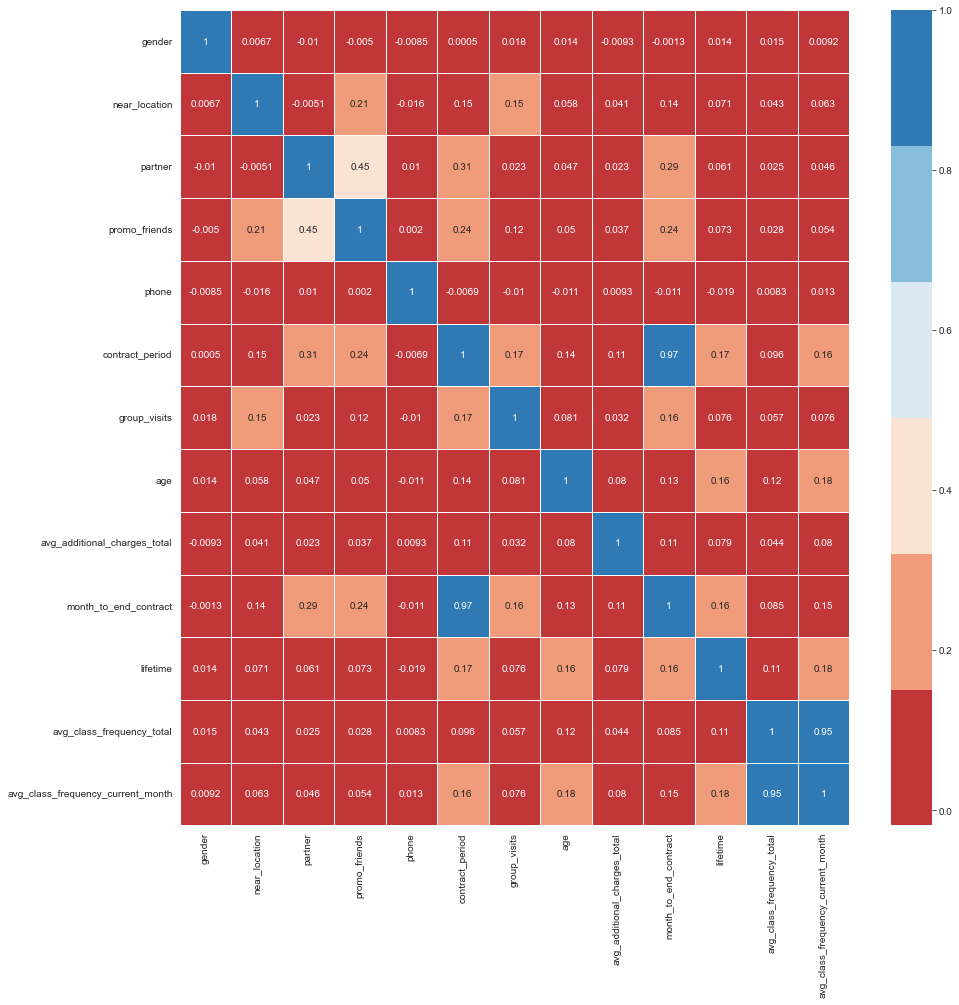

In [44]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=data.drop(columns='churn').corr(), annot=True, cmap= sns.color_palette(palette="RdBu"),linewidths=0.5)

## Итоги исследовательского анализа ##
1. большинство посетителей проживают ближе 1 км от клуба
2. практически все посетители предоставили контактные телефонные номера
3. длительность среднего абонемента составляет ~4.5 месяца
4. групповые тренировки посещает ~41% посетителей
5. средний возраст посетителей ~29 лет
6. высока вероятно мультиколлинеарности ['contract_period] и ['month_to_end_contract'].
   Вероятнее всего указанные параметры выражены в ['lifetime']
7. Среднеей значение оттока ~26%
8. необходимо провести масштабирование признаков
9. наблюдается дисбаланс классов.